###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

###Importing Dataset

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

###Exploring Data

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df['model_year'] = pd.to_datetime(df['model_year'], format='%y')

In [ ]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,13,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,1973-01-01 00:00:00,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,40,249,6
first,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,1982-01-01 00:00:00,NaN,NaN
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,NaN,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,NaN,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,NaN,NaN,NaN


In [ ]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000


In [ ]:
df = df.dropna()

In [ ]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

###Visualize Data

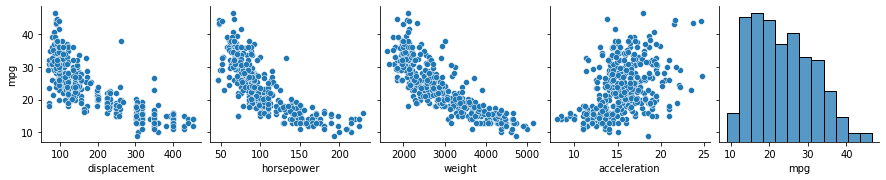

In [ ]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars= ['mpg']) 

###Define y and X 

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

In [ ]:
X = df[['horsepower', 'weight']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,32.2,horsepower
1,32.2,weight


###Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 2), (118, 2), (274,), (118,))

###Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X_train = ss.fit_transform(X_train)

In [ ]:
X_test = ss.fit_transform(X_test)

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.577737226277375

In [ ]:
lr.coef_

array([-1.83276106, -4.89794393])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.15224796342732086

In [ ]:
r2_score(y_test,y_pred)

0.7032406165122396

In [ ]:
 import statsmodels.api as sm
 X = sm.add_constant(X)
 model = sm.OLS(y,X)
 results = model.fit()
 print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.06e-104
Time:                        14:12:56   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
X_train2 = poly.fit_transform(X_train)

In [ ]:
X_train2 = pd.DataFrame(X_train2, columns = ['bias', 'horsepower', 'weight', 'square of horsepower', 'horsepower*weight', 'square of weight'])

In [ ]:
X_train2

,bias,horsepower,weight,square of horsepower,horsepower*weight,square of weight
0,1.0,3.010404,1.923330,9.062532,5.789999,3.699196
1,1.0,-0.903062,-1.150355,0.815521,1.038842,1.323317
2,1.0,-0.687147,0.704394,0.472171,-0.484022,0.496171
3,1.0,0.176515,1.273465,0.031157,0.224785,1.621713
4,1.0,0.446409,-0.049683,0.199281,-0.022179,0.002468
...,...,...,...,...,...,...
269,1.0,0.716303,1.317960,0.513090,0.944059,1.737019
270,1.0,1.795880,1.396412,3.225185,2.507789,1.949967
271,1.0,-0.363274,-0.306116,0.131968,0.111204,0.093707
272,1.0,-0.903062,-1.051997,0.815521,0.950019,1.106698


In [ ]:
X_test2 = poly.fit_transform(X_test)

In [ ]:
X_test2 = pd. DataFrame(X_test2, columns= ['bias', 'horsepower', 'weight', 'square of horsepower', 'horsepower*weight', 'square of weight'])

In [ ]:
lr.fit(X_train2, y_train)

LinearRegression()

In [ ]:
lr.intercept_

22.09857340631859

In [ ]:
lr.coef_

array([ 0.        , -3.81240238, -4.16928337, -0.04228002,  2.21938086,
       -0.41596167])

In [ ]:
y_pred_poly = lr.predict(X_test2)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.13053963468368052

In [ ]:
r2_score(y_test, y_pred_poly)

0.7427946235072436

###Conclusion :-
We have sucessfully implemeted the Linear vs Polynomial Regression problem. We also found out the r2 score for Linear Regresssion = 0.7032 and mean absolute percentage error = 0.1522 and for Poly nomial Regression r2 score = 0.7427 and mean absolute percentage error = 0.1305 